### DEMODE02

# Generic IVP Nonlinear ODE Example

Solve
\begin{align*}
\dot{x_1} &= x_1^2 - 2x_2 - a\\
\dot{x_2} &= b - x_1 - x_2
\end{align*}    

## FORMULATION

In [1]:
from compecon import jacobian, ODE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Phase Diagram Title and Axis Labels

In [2]:
figtitle = 'Nonlinear ODE Phase Diagram'
xlabels  = ['$x_1$', '$x_2$']

### Velocity Function

In [3]:
a =  5
b = -1

def f(x, a, b):
    x1, x2 = x
    return np.array([x1**2 - 2*x2-a, b-x1-x2])

### Initial States

In [4]:
xinit = np.array([[-1,-3],[-1,-6], [-1, -4.5578]])

### Time Horizons

In [5]:
T = [8, 2, 2]

## SOLVE ODE USING RUNGE-KUTTA METHOD (RK4)

### Solve for Different Initial Values

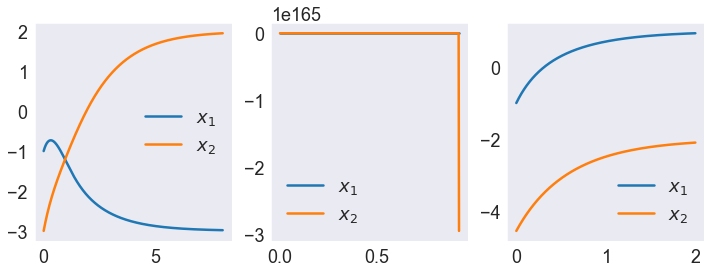

In [6]:
N = 1000   # number of time nodes
x = np.zeros([3,N,2])

problems = [ODE(f,t,x0,a,b) for x0, t in zip(xinit, T)]

# Plot Solutions in Time Domain
fig, axs = plt.subplots(1,3, figsize=[12,4])
for problem, ax in zip(problems, axs):
    problem.rk4(N, xnames=xlabels)
    problem.x.plot(ax=ax)

### STEADY STATES

In [7]:
# Compute Steady State A
A1 = (-2-np.sqrt(4+4*(2*b+a)))/2
A  = np.array([A1,b-A1])
print('Steady State A = ', A, '-->  Eigenvalues = ', np.linalg.eigvals(jacobian(f,A,a,b)))

# Compute Steady State B
B1 = (-2+np.sqrt(4+4*(2*b+a)))/2
B  = np.array([B1,b-B1])
print('Steady State B = ', B, '-->  Eigenvalues = ', np.linalg.eigvals(jacobian(f,B,a,b)))

Steady State A =  [-3.  2.] -->  Eigenvalues =  [-6.3723 -0.6277]
Steady State B =  [ 1. -2.] -->  Eigenvalues =  [ 2.5616 -1.5616]


### PHASE DIAGRAM

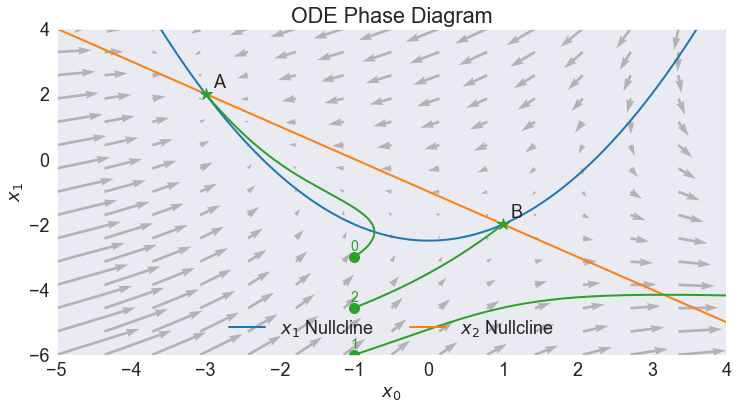

In [8]:
# Ploting Limits
x1lim = [-5, 4]
x2lim = [-6, 4]

# Compute Separatrix
T = 10;
problem2 = ODE(f,T,B,a,b)
problem2.spx()

x = np.array([problem.x.values.T for problem in problems])

# Compute Nullclines
x1 = np.linspace(*x1lim, 100)
xnulls = pd.DataFrame({'$x_1$ Nullcline': (x1**2-a)/2,
                       '$x_2$ Nullcline': b-x1},
                     index = x1)

# Plot Phase Diagram
ax = problem.phase(x1lim, x2lim, 
         xnulls=xnulls, 
         xstst=np.r_[A,B],
         x=x,
         title='ODE Phase Diagram', xlabel='$x_0$', ylabel='$x_1$'
        )

for txt, xy in zip('AB', [A,B]):
    ax.annotate(txt, xy + [0.1,0.2])
    
for i, xy in enumerate(x[:,:,0]):
    ax.annotate(str(i), xy+[0,0.20], color='C2', ha='center', fontsize=14)
